In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

In [ ]:
#Carga desde un archivo .csv sin indice
micro = pd.read_csv('Microretailer_limpio_evidencia2.csv')
micro.head(5)

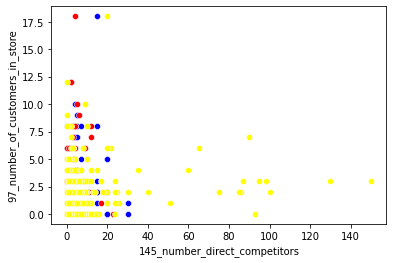

In [ ]:
#se grafican mapas de disperision de las variables #competidores, #refrigeradores, #muebles
from turtle import color

sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color='blue', data=micro)
sns.scatterplot(x='268_number_fridges', y='97_number_of_customers_in_store', color='red', data=micro)
sns.scatterplot(x='104_how_many_shelves_does_the_micro_retailer_have', y='97_number_of_customers_in_store', color='yellow', data=micro)

In [ ]:
#Declaramos las variables dependientes e independientes para la regresion lineal
Vars_Indep=micro[['145_number_direct_competitors', '268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have']]
Var_Dep=micro['97_number_of_customers_in_store']

In [ ]:
#se define model como la funcion de regresion lineal
from sklearn.linear_model import LinearRegression
model= LinearRegression()

In [ ]:
#verificamos la funcion relacionada al modelo
type(model)

sklearn.linear_model._base.LinearRegression

In [ ]:
from numpy.lib.twodim_base import vander
#ajustamos el modela con las variables antes declaradas
model.fit(X=Vars_Indep, y=Var_Dep)
LinearRegression()

LinearRegression()

In [ ]:
#verificamos los coeficientes obtenidos para el modelo ajustado
model.__dict__

{'fit_intercept': True,
 'normalize': 'deprecated',
 'copy_X': True,
 'n_jobs': None,
 'positive': False,
 'feature_names_in_': array(['145_number_direct_competitors', '268_number_fridges',
        '104_how_many_shelves_does_the_micro_retailer_have'], dtype=object),
 'n_features_in_': 3,
 'coef_': array([-0.01022968,  0.21189125,  0.00967936]),
 '_residues': 883.7713474331716,
 'rank_': 3,
 'singular_': array([122.74872792,  45.63149949,  35.2960898 ]),
 'intercept_': 0.9993785285513768}

y = -0.01022968(145_number_direct_competitors) + 0.21189125(268_number_fridges) + 0.00967936(104_how_many_shelves_does_the_micro_retailer_have) + 0.9993785285513768

In [ ]:
#evaluamos la eficiencia del modelo obtenido por medio del coeficiente R2 
model.score(Vars_Indep,Var_Dep)

0.06751159386391137

In [ ]:
#Predecimos los valores de total de accidentes a partir de las variables: 'alcohol', 'speeding' y 'no_previous'
y_pred = model.predict(X=micro[['145_number_direct_competitors', '268_number_fridges', '104_how_many_shelves_does_the_micro_retailer_have']])
y_pred

array([1.85054984, 1.85054984, 1.83009047, 1.0234442 , 2.04198172,
       2.6960689 , 1.41546849, 1.40744011, 1.83301693, 1.84269629,
       1.35739235, 1.42859314, 1.83451254, 1.42095972, 0.99937853,
       1.62427227, 1.39955507, 1.01433462, 1.26934592, 0.96758882,
       0.96648817, 1.14934135, 1.16980072, 1.39192165, 1.37146228,
       1.38169197, 1.390821  , 1.2096188 , 0.98545193, 1.38987571,
       1.92013114, 1.17798446, 0.99513128, 1.21984848, 0.99772755,
       1.40923443, 0.95641386, 0.95641386, 0.98545193, 1.39955507,
       1.8231822 , 1.01763659, 1.18058073, 1.18970976, 1.20048977,
       1.42300566, 1.82333757, 2.02554947, 1.85387125, 0.95790946,
       1.3402229 , 1.89368934, 1.00685658, 0.97986444, 0.92611976,
       1.19026008, 1.61144632, 1.19026008, 2.94069514, 1.19175569,
       2.98273399, 1.19828846, 1.00481064, 0.99513128, 1.34200623,
       0.98804819, 1.19175569, 1.43701647, 1.09507144, 1.22094914,
       1.00905789, 1.85662289, 0.97836883, 1.65110903, 0.97781

In [ ]:
#Insertamos la columna de predicciones en el Dataframe
micro.insert(0, 'Predicciones', y_pred)
micro

,Predicciones,Unnamed: 0,228_store_name,232_type_of_store,108_does_the_micro_retailer_has_a_barred_window_,99_does_the_micro_retailer_exhibits_products_outside_,102_does_the_micro_retailer_sells_fresh_products_,184_store_devices,hola_somos_estudiantes_del_tec_de_monterrey_estamos_realiz,le_comento_que_toda_esta_informacin_es_confidencial,...,24_burnout,272_card_days_receive_money,276_expected_days_informal_credit,36_credit_default_rate,315_frequency_topups,316_frequency_utility_bills,317_home_deliveries,62_frequency_only_services,78_number_home_deliveries_week,172_supplier_frequency
0,1.850550,0,MINI SUPER 3 NORTE,Grocery store (aka. nanostore),no,no,yes,Analog cash register,no,no,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,4.0
1,1.850550,1,Miscelánea,Grocery store (aka. nanostore),no,no,yes,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,1.0
2,1.830090,2,Miscelánea casa cruz,Grocery store (aka. nanostore),no,no,no,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,3.0
3,1.023444,3,SUPER & ALMACENES,Chacharas,no,no,no,POS system (i.e. computer + bar code scanner +...,yes,yes,...,3.9,1.0,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.0
4,2.041982,4,Ranita “V”,Grocery store (aka. nanostore),no,no,no,Analog cash register,yes,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
439,1.227877,439,Xuti Galería,productos tradicionales,no,yes,no,Analog cash register,yes,yes,...,3.9,1.0,12.0,1.4,12.0,6.5,13.2,1.0,2.2,5.0
440,1.004811,440,July Store,Grocery store (aka. nanostore),yes,no,no,"Analog cash register,Smartphone",no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5
441,1.177984,441,La fonda,Micro-restaurant (aka. fondita),yes,no,yes,Smartphone,no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5
442,1.177984,442,"Birria de Res ""Hermanos Negreros 2"" estilo Tij...",Micro-restaurant (aka. fondita),no,no,yes,Analog cash register,no,yes,...,3.9,1.1,12.0,1.4,12.0,6.5,13.2,8.2,2.2,2.5


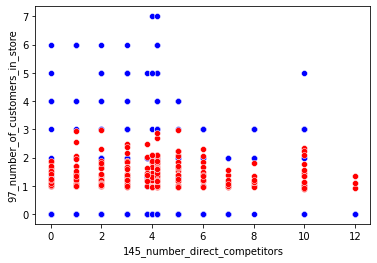

In [ ]:
#Comparamos entre total real y total predictivo
sns.scatterplot(x='145_number_direct_competitors', y='97_number_of_customers_in_store', color="blue" , data=micro)
sns.scatterplot(x='145_number_direct_competitors', y='Predicciones', color="red" , data=micro)

In [ ]:
#Corroboramos cual es el coeficiente de Determinación de nuestro modelo
coef_Deter = model.score(X=Vars_Indep,y=Var_Dep)
coef_Deter

0.06751159386391137

In [ ]:
#Corroboramos cual es el coeficiente de correlación de nuestro modelo
coef_Correl = np.sqrt(coef_Deter)
coef_Correl

0.25982993257881465